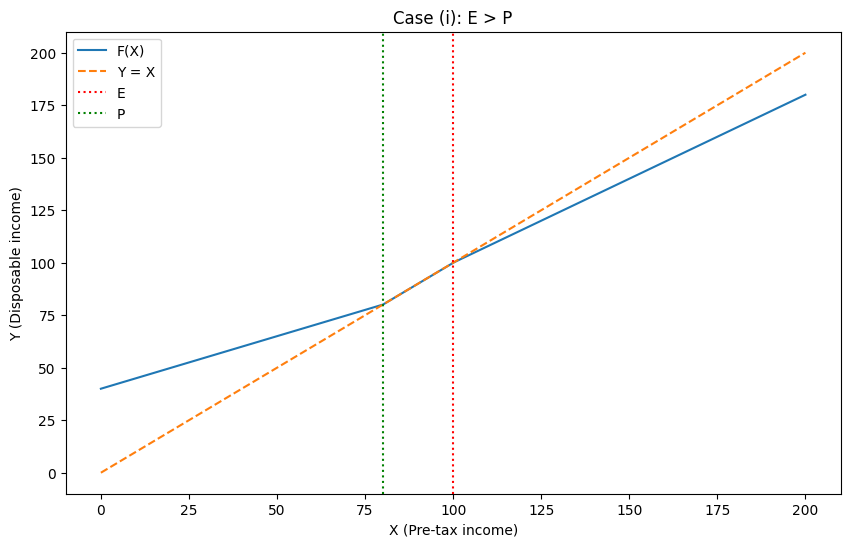

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def F(X, E, P, t, s):
    Y = np.zeros_like(X)
    for i, x in enumerate(X):
        if x < min(E, P):
            Y[i] = x + s * (P - x)
        elif E <= x < P:
            Y[i] = x - t * (x - E) + s * (P - x)
        elif P <= x < E:
            Y[i] = x
        else:
            Y[i] = x - t * (x - E)
    return Y

def plot_case(E, P, t, s, title):
    X = np.linspace(0, 2 * max(E, P), 1000)
    Y = F(X, E, P, t, s)
    
    plt.figure(figsize=(10, 6))
    plt.plot(X, Y, label='F(X)')
    plt.plot(X, X, '--', label='Y = X')
    
    plt.axvline(x=E, color='r', linestyle=':', label='E')
    plt.axvline(x=P, color='g', linestyle=':', label='P')
    
    plt.xlabel('X (Pre-tax income)')
    plt.ylabel('Y (Disposable income)')
    plt.title(title)
    plt.legend()

# Case (i): E > P
plot_case(E=100, P=80, t=0.2, s=0.5, title='Case (i): E > P')
plt.show()

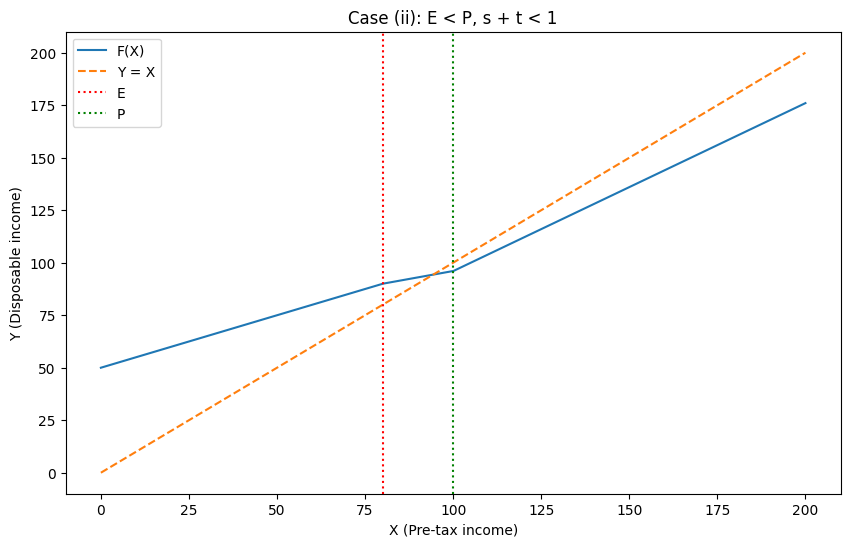

In [8]:
# Case (ii): E < P, s + t < 1
plot_case(E=80, P=100, t=0.2, s=0.5, title='Case (ii): E < P, s + t < 1')

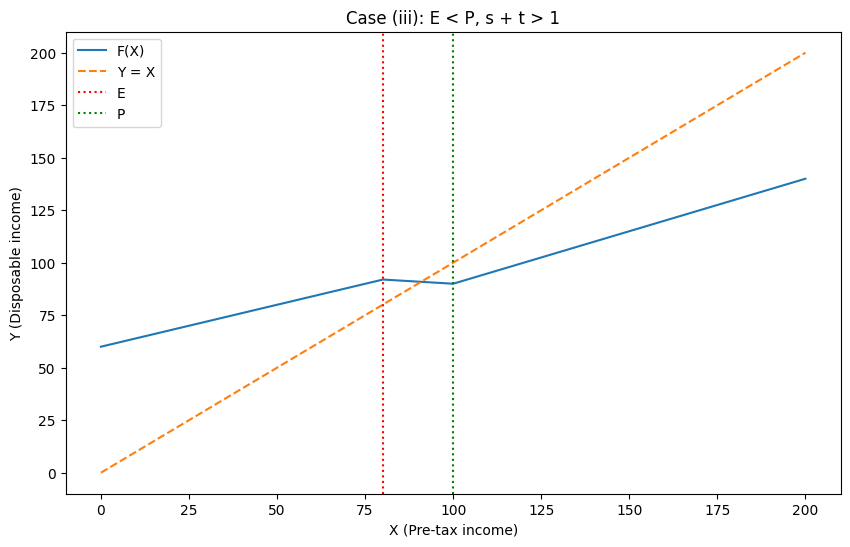

In [7]:
# Case (iii): E < P, s + t > 1
plot_case(E=80, P=100, t=0.5, s=0.6, title='Case (iii): E < P, s + t > 1')

In [4]:
import numpy as np
import pandas as pd

# Define the function and its derivatives
def f(x):
    return x**2 * np.log(x)

def f_prime(x):
    return 2*x*np.log(x) + x

def f_double_prime(x):
    return 2*np.log(x) + 3

def f_triple_prime(x):
    return 2/x

# Given values
x_values = np.array([0.8, 0.95, 1.02, 1.10, 1.25])
x0 = 1

# Calculate the exact values
exact_values = f(x_values)

# Calculate the approximations
f_0 = f(x0)
f_1 = f_prime(x0)
f_2 = f_double_prime(x0) / 2
f_3 = f_triple_prime(x0) / 6

linear_approx = f_0 + f_1 * (x_values - x0)
quadratic_approx = f_0 + f_1 * (x_values - x0) + f_2 * (x_values - x0)**2
cubic_approx = f_0 + f_1 * (x_values - x0) + f_2 * (x_values - x0)**2 + f_3 * (x_values - x0)**3

# Create a table
table = pd.DataFrame({
    'x': x_values,
    'Exact Value': exact_values,
    'Linear Approx': linear_approx,
    'Quadratic Approx': quadratic_approx,
    'Cubic Approx': cubic_approx
})

table


,x,Exact Value,Linear Approx,Quadratic Approx,Cubic Approx
0,0.80,-0.142812,-0.20,-0.14000,-0.142667
1,0.95,-0.046292,-0.05,-0.04625,-0.046292
2,1.02,0.020603,0.02,0.02060,0.020603
3,1.10,0.115325,0.10,0.11500,0.115333
4,1.25,0.348662,0.25,0.34375,0.348958
